# 

0.06749157951637652 0.19514199868750862 0.018420144412342472 6.582370662796177


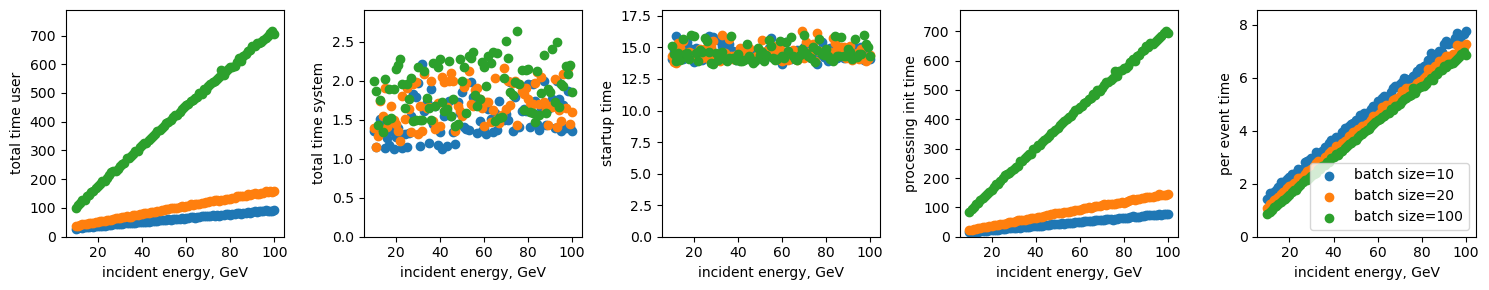

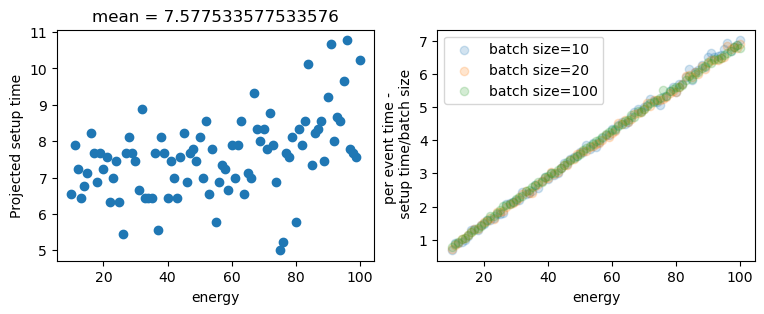

In [28]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
path_g4 = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/Geant_4_timing_detectorProj.npz"
loaded_g4 = np.load(path_g4)


g4_energies = loaded_g4["energy"]
g4_batch_size = loaded_g4["batch_size"]
time_keys = [key for key in loaded_g4 if "time" in key]
n_time_keys = len(time_keys)
fig, axarr = plt.subplots(1, n_time_keys, figsize=(15, 3))
for ax, key in zip(axarr, time_keys):
    time = loaded_g4[key]
    for size in np.unique(g4_batch_size):
        mask = g4_batch_size==size
        ax.scatter(g4_energies[mask], time[mask], label=f"batch size={size}")
    ax.set_ylabel(key.replace('_', ' '))
    ax.set_xlabel("incident energy, GeV")
    ax.set_ylim(0, np.max(time)*1.1)
ax.legend()
plt.tight_layout()


time = loaded_g4["per_event_time"]
    

def fit_setup_cost(batch_sizes, times, energies):
    # per_event_times = true_per_event_time + startup_factor/batch_sizes
    # per_event_times = 
    #                  true_per_event_e_factor*energies + true_per_event_const + 
    #                  (startup_factor*energies + startup_const)/batch_sizes
    # times*batch_sizes - 
    def to_minimise(factors):
        true_per_event_factor, true_per_event_const, startup_factor, startup_constant = factors
        pred_times = true_per_event_factor*energies + true_per_event_const + (startup_factor*energies + startup_constant)/batch_sizes
        err = pred_times - times
        return np.sum(err**2)
    bounds = [(0, None), (0, None), (None, None), (0, None)]
    x0 = [1, 0, 0, np.min(times)/np.min(batch_sizes)]
    res = scipy.optimize.minimize(to_minimise, x0, bounds=bounds)
    return res.x
    

true_per_event_factor, true_per_event_const, startup_factor, startup_constant = fit_setup_cost(g4_batch_size, time, g4_energies)
print(true_per_event_factor, true_per_event_const, startup_factor, startup_constant)

es = np.array([10, 100])
for batch_size in [10, 20, 100]:
    pred_times = 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
g4_setup_cost = (time[g4_batch_size==10] - time[g4_batch_size==100])/(1/10 - 1/100)

ax1.scatter(g4_energies[g4_batch_size==10], g4_setup_cost)
ax1.set_ylabel("Projected setup time")
ax1.set_xlabel("energy")
g4_mean_cost = np.mean(g4_setup_cost)
ax1.set_title(f"mean = {g4_mean_cost}")

g4_per_event_no_setup = loaded_g4["per_event_time"] - g4_mean_cost/g4_batch_size
for size in np.unique(g4_batch_size):
    mask = g4_batch_size==size
    ax2.scatter(g4_energies[mask], g4_per_event_no_setup[mask], label=f"batch size={size}", alpha=0.2)
ax2.legend()
ax2.set_ylabel("per event time - \n setup time/batch size")
ax2.set_xlabel("energy")



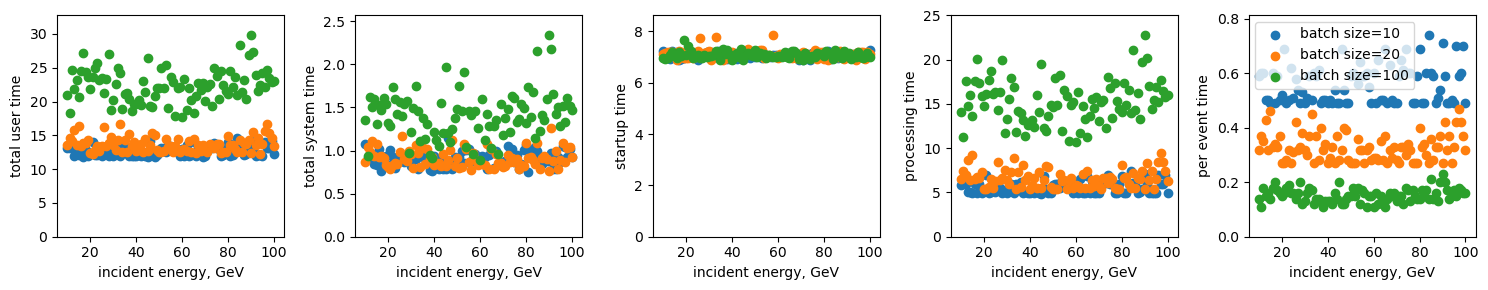

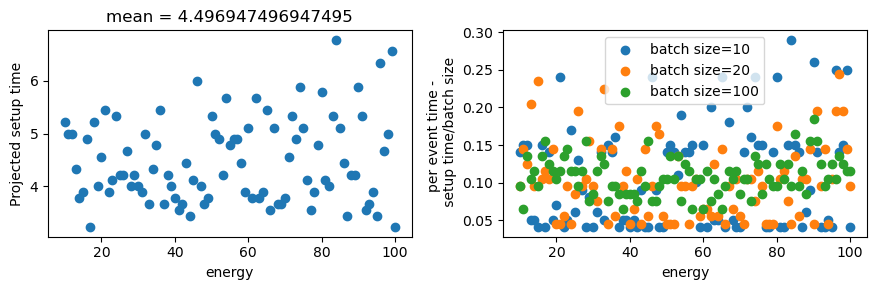

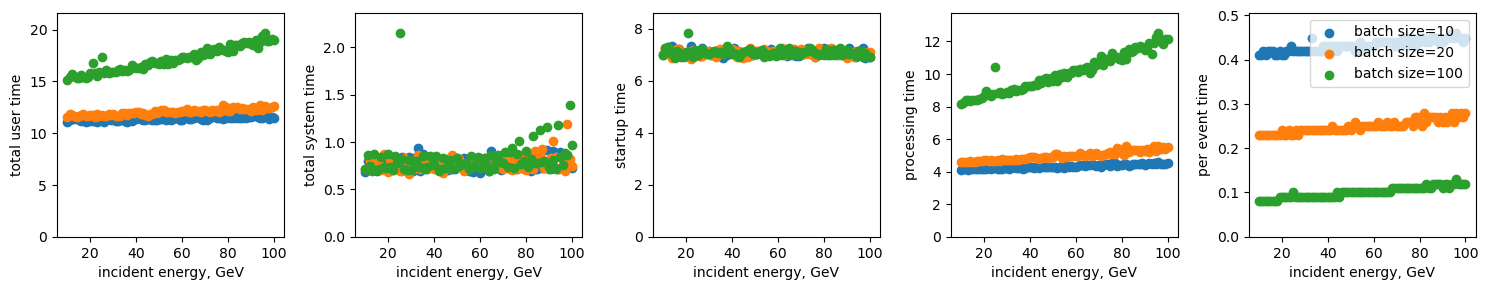

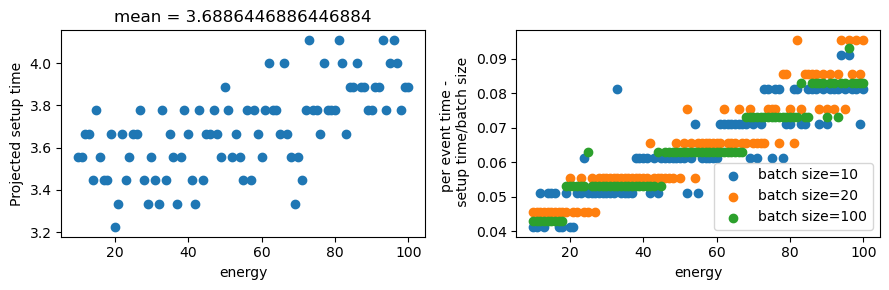

In [4]:
import numpy as np
from matplotlib import pyplot as plt
path_cc = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CC_timing_ddsim.npz"
all_loaded_cc = dict(np.load(path_cc))
model_number = all_loaded_cc["model number"]
all_loaded_cc["per_event_no_setup"] = -np.ones(len(model_number))
for i in [2, 3]:
    loaded_cc = {key: all_loaded_cc[key][model_number==i] for key in all_loaded_cc}
    cc_energies = loaded_cc["energy"]
    cc_batch_size = loaded_cc["batch size"]
    time_keys = [key for key in loaded_cc if "time" in key]
    n_time_keys = len(time_keys)
    fig, axarr = plt.subplots(1, n_time_keys, figsize=(15, 3))
    for ax, key in zip(axarr, time_keys):
        time = loaded_cc[key]
        for size in np.unique(cc_batch_size):
            mask = cc_batch_size==size
            ax.scatter(cc_energies[mask], time[mask], label=f"batch size={size}")
        ax.set_ylabel(key.replace('_', ' '))
        ax.set_xlabel("incident energy, GeV")
        ax.set_ylim(0, np.max(time)*1.1)
    ax.legend()
    plt.tight_layout()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    
    time = loaded_cc["per event time"]
    cc_setup_cost = (time[cc_batch_size==10] - time[cc_batch_size==100])/(1/10 - 1/100)
    ax1.scatter(cc_energies[cc_batch_size==10], cc_setup_cost)
    ax1.set_ylabel("Projected setup time")
    ax1.set_xlabel("energy")
    cc_mean_cost = np.mean(cc_setup_cost)
    ax1.set_title(f"mean = {cc_mean_cost}")
    
    cc_per_event_no_setup = loaded_cc["per event time"] - cc_mean_cost/cc_batch_size
    for size in np.unique(cc_batch_size):
        mask = cc_batch_size==size
        ax2.scatter(cc_energies[mask], cc_per_event_no_setup[mask], label=f"batch size={size}")
    all_loaded_cc["per_event_no_setup"][model_number==i] = cc_per_event_no_setup
    ax2.legend()
    ax2.set_ylabel("per event time - \n setup time/batch size")
    ax2.set_xlabel("energy")
    plt.tight_layout()


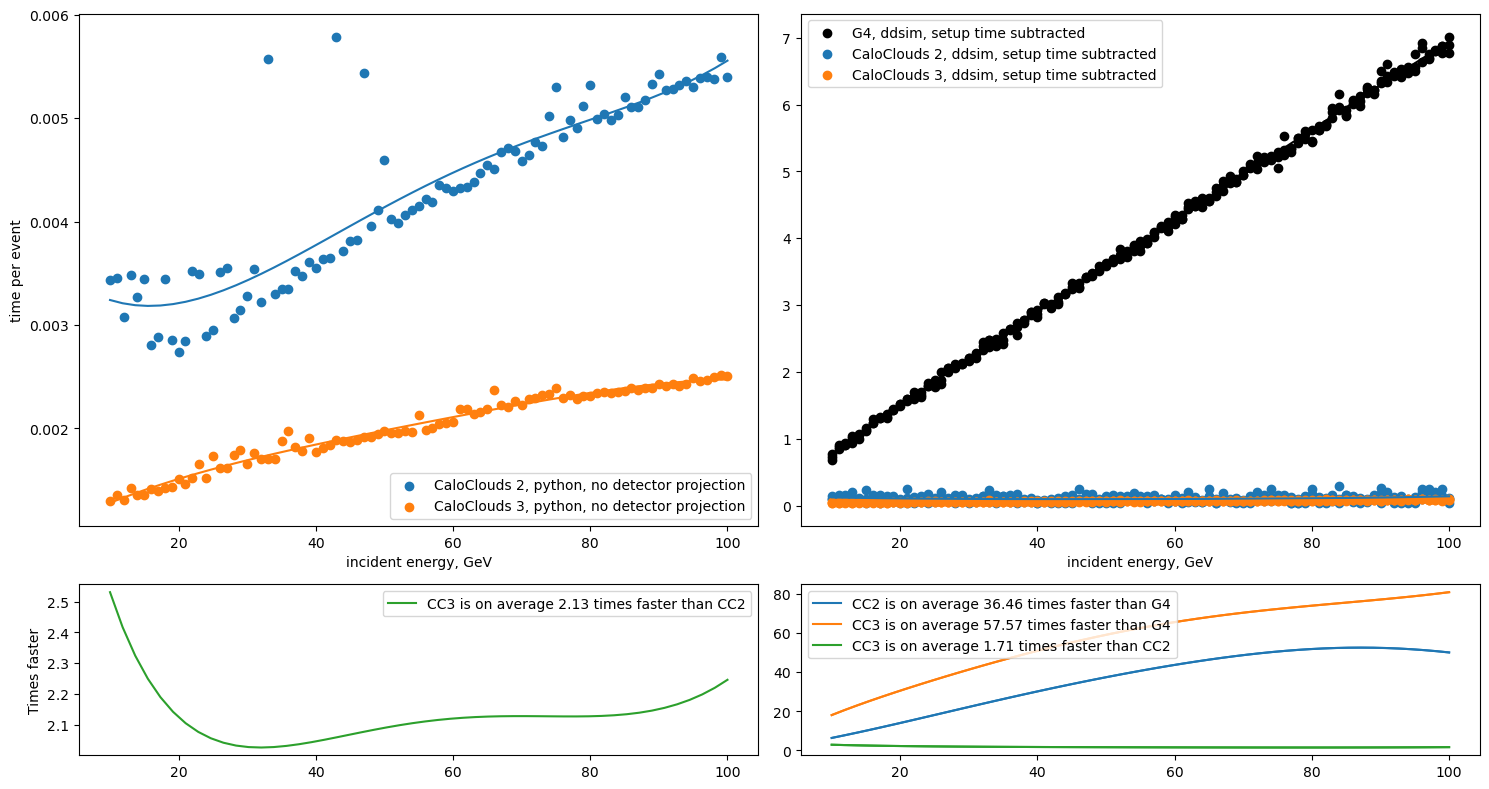

In [6]:
path_cc3 = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds3-ShowerFlow_a1_fnorms_2_p22_th90_ph90_en10-100_timingb100.npz"
loaded_cc3 = np.load(path_cc3)
path_cc2 = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100_timingb100.npz"
loaded_cc2 = np.load(path_cc2)
xs = np.linspace(10, 100, 50)

height_ratios = [3, 1]
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(15, 8), 
            gridspec_kw={"height_ratios": height_ratios},)

energies = loaded_cc2["energy"]
time = loaded_cc2["time"]/100
cc2_coeffs = np.polyfit(energies, time, 4)
cc2_fit = np.polyval(cc2_coeffs, xs)
ax1.plot(xs, cc2_fit, c='tab:blue')
ax1.scatter(energies, time, c='tab:blue', label="CaloClouds 2, python, no detector projection")

energies = loaded_cc3["energy"]
time = loaded_cc3["time"]/100
cc3_coeffs = np.polyfit(energies, time, 4)
cc3_fit = np.polyval(cc3_coeffs, xs)
ax1.plot(xs, cc3_fit, c='tab:orange')
ax1.scatter(energies, time, label="CaloClouds 3, python, no detector projection", c='tab:orange')


ax1.set_ylabel("time per event")
ax1.set_xlabel("incident energy, GeV")
ax1.legend()

ax2.plot(xs, cc2_fit/cc3_fit, c='tab:green', label=f'CC3 is on average {np.mean(cc2_fit/cc3_fit):.2f} times faster than CC2')
ax2.legend()
ax2.set_ylabel("Times faster")



ax3.scatter(g4_energies, g4_per_event_no_setup, c='k', label="G4, ddsim, setup time subtracted")
g4_ddsim_fit = np.polyval(np.polyfit(g4_energies, g4_per_event_no_setup, 4), xs)
ax3.plot(xs, g4_ddsim_fit, c='k')
ax3.set_xlabel("incident energy, GeV")

cc2_energies = all_loaded_cc["energy"][model_number==2]
cc3_energies = all_loaded_cc["energy"][model_number==3]
cc2_per_event_no_setup = all_loaded_cc["per_event_no_setup"][model_number==2]
cc3_per_event_no_setup = all_loaded_cc["per_event_no_setup"][model_number==3]
cc2_ddsim_fit = np.polyval(np.polyfit(cc2_energies, cc2_per_event_no_setup, 4), xs)
cc3_ddsim_fit = np.polyval(np.polyfit(cc3_energies, cc3_per_event_no_setup, 4), xs)

ax3.scatter(cc2_energies, cc2_per_event_no_setup, c='tab:blue', label="CaloClouds 2, ddsim, setup time subtracted")
ax3.plot(xs, cc2_ddsim_fit, c='tab:blue')
ax3.scatter(cc3_energies, cc3_per_event_no_setup, c='tab:orange', label="CaloClouds 3, ddsim, setup time subtracted")
ax3.plot(xs, cc3_ddsim_fit, c='tab:orange')
ax3.legend()

ax4.plot(xs, g4_ddsim_fit/cc2_ddsim_fit, c='tab:blue')
ax4.plot(xs, g4_ddsim_fit/cc3_ddsim_fit, c='tab:orange')
ax4.plot(xs, cc2_ddsim_fit/cc3_ddsim_fit, c='tab:green')

ax4.plot(xs, g4_ddsim_fit/cc2_ddsim_fit, c='tab:blue', label=f"CC2 is on average {np.mean(g4_ddsim_fit/cc2_ddsim_fit):.2f} times faster than G4")
ax4.plot(xs, g4_ddsim_fit/cc3_ddsim_fit, c='tab:orange', label=f"CC3 is on average {np.mean(g4_ddsim_fit/cc3_ddsim_fit):.2f} times faster than G4")
ax4.plot(xs, cc2_ddsim_fit/cc3_ddsim_fit, c='tab:green', label=f"CC3 is on average {np.mean(cc2_ddsim_fit/cc3_ddsim_fit):.2f} times faster than CC2")
ax4.legend()

plt.tight_layout()


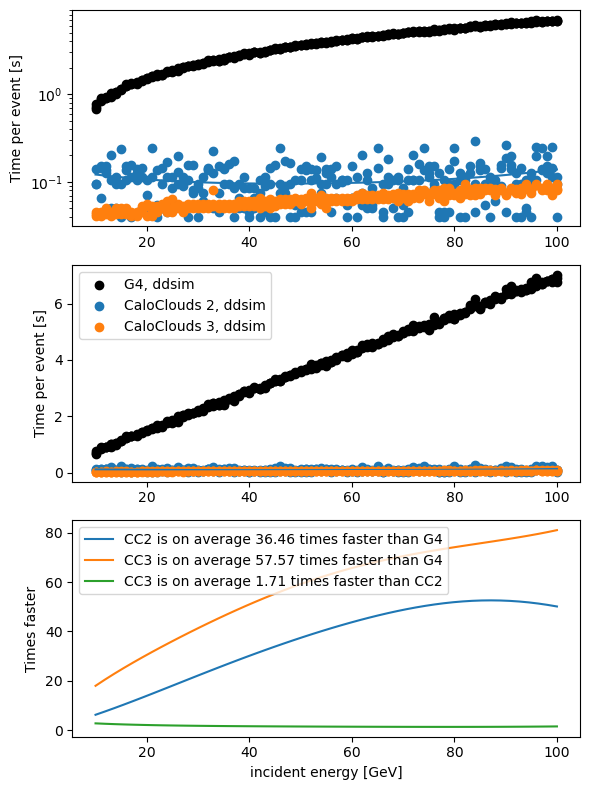

In [7]:
path_cc3 = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds3-ShowerFlow_a1_fnorms_2_p22_th90_ph90_en10-100_timingb100.npz"
loaded_cc3 = np.load(path_cc3)
path_cc2 = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100_timingb100.npz"
loaded_cc2 = np.load(path_cc2)

height_ratios = [3, 3, 3]
fig, (ax1, ax3, ax4) = plt.subplots(3, 1, figsize=(6, 8), 
            gridspec_kw={"height_ratios": height_ratios},)

g4_ddsim_fit = np.polyval(np.polyfit(g4_energies, g4_per_event_no_setup, 4), xs)

cc2_energies = all_loaded_cc["energy"][model_number==2]
cc3_energies = all_loaded_cc["energy"][model_number==3]
cc2_per_event_no_setup = all_loaded_cc["per_event_no_setup"][model_number==2]
cc3_per_event_no_setup = all_loaded_cc["per_event_no_setup"][model_number==3]
cc2_ddsim_fit = np.polyval(np.polyfit(cc2_energies, cc2_per_event_no_setup, 4), xs)
cc3_ddsim_fit = np.polyval(np.polyfit(cc3_energies, cc3_per_event_no_setup, 4), xs)

for ax in [ax1, ax3]: 
    ax.scatter(g4_energies, g4_per_event_no_setup, c='k', label="G4, ddsim")
    ax.plot(xs, g4_ddsim_fit, c='k')
    
    
    ax.scatter(cc2_energies, cc2_per_event_no_setup, c='tab:blue', label="CaloClouds 2, ddsim")
    ax.plot(xs, cc2_ddsim_fit, c='tab:blue')
    ax.scatter(cc3_energies, cc3_per_event_no_setup, c='tab:orange', label="CaloClouds 3, ddsim")
    ax.plot(xs, cc3_ddsim_fit, c='tab:orange')
    ax.set_ylabel("Time per event [s]")
ax3.legend()
ax1.semilogy()
ax4.set_xlabel("incident energy [GeV]")

ax4.plot(xs, g4_ddsim_fit/cc2_ddsim_fit, c='tab:blue', label=f"CC2 is on average {np.mean(g4_ddsim_fit/cc2_ddsim_fit):.2f} times faster than G4")
ax4.plot(xs, g4_ddsim_fit/cc3_ddsim_fit, c='tab:orange', label=f"CC3 is on average {np.mean(g4_ddsim_fit/cc3_ddsim_fit):.2f} times faster than G4")
ax4.plot(xs, cc2_ddsim_fit/cc3_ddsim_fit, c='tab:green', label=f"CC3 is on average {np.mean(cc2_ddsim_fit/cc3_ddsim_fit):.2f} times faster than CC2")
ax4.set_ylabel("Times faster")
ax4.legend()
plt.tight_layout()


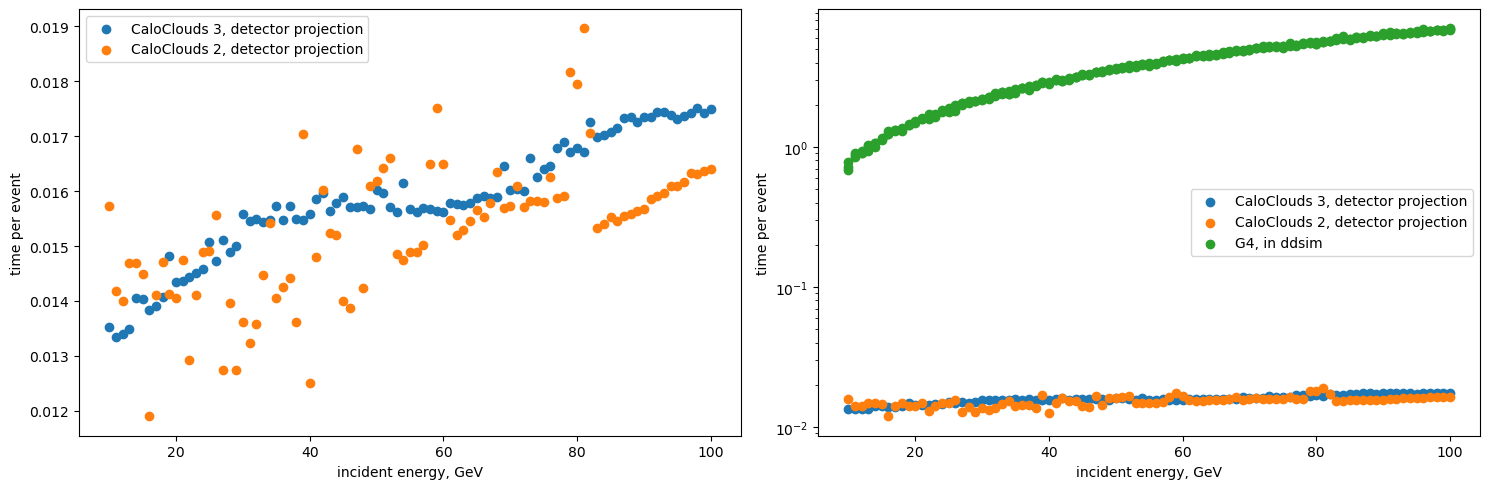

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

path_cc3 = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds3-ShowerFlow_a1_fnorms_2_p22_th90_ph90_en10-100_timingb100_detectorProj.npz"
loaded_cc3 = np.load(path_cc3)
path_cc2 = "/data/dust/user/dayhallh/point-cloud-diffusion-logs/binned_metrics/CaloClouds2-ShowerFlow_CC2_p22_th90_ph90_en10-100_timingb100_detectorProj.npz"
loaded_cc2 = np.load(path_cc2)



energies = loaded_cc3["energy"]
time = loaded_cc3["time"]/100
ax1.scatter(energies, time, label="CaloClouds 3, detector projection")
ax2.scatter(energies, time, label="CaloClouds 3, detector projection")

energies = loaded_cc2["energy"]
time = loaded_cc2["time"]/100
ax1.scatter(energies, time, label="CaloClouds 2, detector projection")
ax2.scatter(energies, time, label="CaloClouds 2, detector projection")

ax2.scatter(g4_energies, g4_per_event_no_setup, label="G4, in ddsim")
ax2.semilogy()

for ax in [ax1, ax2]:
    ax.set_ylabel("time per event")
    ax.set_xlabel("incident energy, GeV")
    ax.legend()
plt.tight_layout()

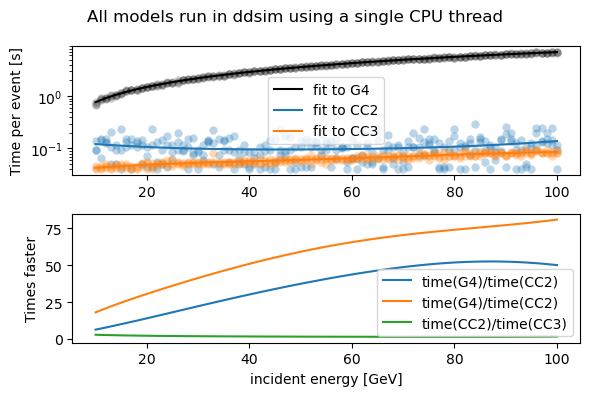

In [18]:

height_ratios = [3, 3]
fig, (ax1, ax4) = plt.subplots(2, 1, figsize=(6, 4), 
            gridspec_kw={"height_ratios": height_ratios},)

g4_ddsim_fit = np.polyval(np.polyfit(g4_energies, g4_per_event_no_setup, 4), xs)

cc2_energies = all_loaded_cc["energy"][model_number==2]
cc3_energies = all_loaded_cc["energy"][model_number==3]
cc2_per_event_no_setup = all_loaded_cc["per_event_no_setup"][model_number==2]
cc3_per_event_no_setup = all_loaded_cc["per_event_no_setup"][model_number==3]
cc2_ddsim_fit = np.polyval(np.polyfit(cc2_energies, cc2_per_event_no_setup, 4), xs)
cc3_ddsim_fit = np.polyval(np.polyfit(cc3_energies, cc3_per_event_no_setup, 4), xs)

for ax in [ax1]: 
    ax.scatter(g4_energies, g4_per_event_no_setup, c='k', alpha=0.2, lw=0)
    ax.plot(xs, g4_ddsim_fit, c='k', label="fit to G4")
    
    
    ax.scatter(cc2_energies, cc2_per_event_no_setup, c='tab:blue', alpha=0.3, lw=0)
    ax.plot(xs, cc2_ddsim_fit, c='tab:blue', label="fit to CC2")
    ax.scatter(cc3_energies, cc3_per_event_no_setup, c='tab:orange', alpha=0.3, lw=0)
    ax.plot(xs, cc3_ddsim_fit, c='tab:orange', label="fit to CC3")
    ax.set_ylabel("Time per event [s]")
ax1.legend()
ax1.semilogy()
ax4.set_xlabel("incident energy [GeV]")

ax4.plot(xs, g4_ddsim_fit/cc2_ddsim_fit, c='tab:blue', label=f"time(G4)/time(CC2)")
ax4.plot(xs, g4_ddsim_fit/cc3_ddsim_fit, c='tab:orange', label=f"time(G4)/time(CC2)")
ax4.plot(xs, cc2_ddsim_fit/cc3_ddsim_fit, c='tab:green', label=f"time(CC2)/time(CC3)")
ax4.set_ylabel("Times faster")
ax4.legend()
fig.suptitle("All models run in ddsim using a single CPU thread")
plt.tight_layout()
for ending in ['png', 'pdf', 'jpg']:
    plt.savefig("/data/dust/user/dayhallh/point-cloud-diffusion-images/ddsim_timing." + ending)
    

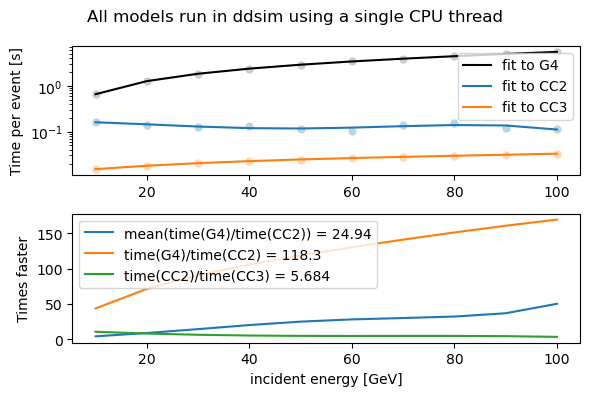

In [22]:
import os
import glob

path_format = "/home/dayhallh/training/physical_recos/ddfastshowerml/anatolii_output{}_en{}_{}_try{}.txt"
g4_times = np.zeros((10, 3), dtype=float)
cc2_times = np.zeros((10, 3), dtype=float)

for ie in range(10):
    e = (ie+1)*10
    for t in [1, 2, 3]:
        for model_name in ["g4", "cc2_v2"]:
            model_path_2 = path_format.format(2, e, model_name, t) 
            with open(model_path_2, 'r') as opened:
                line = opened.readlines()[-2]
            if not line.startswith("DDSim            INFO StartUp Time"):
                continue
            time_model_2 = float(line.split("Event Processing: ")[1].split(" s ")[0])
            model_path_100 = path_format.format(100, e, model_name, t) 
            with open(model_path_100, 'r') as opened:
                line = opened.readlines()[-2]
            if not line.startswith("DDSim            INFO StartUp Time"):
                continue
            time_model_100 = float(line.split("Event Processing: ")[1].split(" s ")[0])
            if model_name == "g4":
                g4_times[ie, t-1] = (time_model_100 - time_model_2)/98
            else:
                cc2_times[ie, t-1] = (time_model_100 - time_model_2)/98
                


cc2_per_event_no_setup = np.mean(cc2_times, axis=1)
g4_per_event_no_setup = np.mean(g4_times, axis=1)



cc_startup = np.load('/data/dust/user/akorol/projects/test_analysis/l2l/analysis_chain/ddfastshowerml/scripts/startup_time_cc_epyc.npy')[:, :10]
cc_gen_time = np.load('/data/dust/user/akorol/projects/test_analysis/l2l/analysis_chain/ddfastshowerml/scripts/gen_time_cc_epyc.npy')[:, :10]


energies = np.arange(10, 101, 10)

cc_time = ( cc_gen_time - cc_startup ) / 50
cc_err = cc_time.std(axis=0)
cc_time = cc_time.mean(axis=0)

xs = energies
height_ratios = [3, 3]
fig, (ax1, ax4) = plt.subplots(2, 1, figsize=(6, 4), 
            gridspec_kw={"height_ratios": height_ratios},)

cc3_energies = cc2_energies = g4_energies = np.arange(10, 101, 10)
cc3_per_event_no_setup = cc_time
cc2_ddsim_fit = np.polyval(np.polyfit(cc2_energies, cc2_per_event_no_setup, 4), xs)
cc3_ddsim_fit = np.polyval(np.polyfit(cc3_energies, cc3_per_event_no_setup, 4), xs)
g4_ddsim_fit = np.polyval(np.polyfit(g4_energies, g4_per_event_no_setup, 4), xs)

for ax in [ax1]: 
    ax.scatter(g4_energies, g4_per_event_no_setup, c='k', alpha=0.2, lw=0)
    ax.plot(xs, g4_ddsim_fit, c='k', label="fit to G4")
    
    
    ax.scatter(cc2_energies, cc2_per_event_no_setup, c='tab:blue', alpha=0.3, lw=0)
    ax.plot(xs, cc2_ddsim_fit, c='tab:blue', label="fit to CC2")
    ax.scatter(cc3_energies, cc3_per_event_no_setup, c='tab:orange', alpha=0.3, lw=0)
    ax.plot(xs, cc3_ddsim_fit, c='tab:orange', label="fit to CC3")
    ax.set_ylabel("Time per event [s]")
ax1.legend()
ax1.semilogy()
ax4.set_xlabel("incident energy [GeV]")

ax4.plot(xs, g4_ddsim_fit/cc2_ddsim_fit, c='tab:blue', label=f"mean(time(G4)/time(CC2)) = {np.mean(g4_ddsim_fit/cc2_ddsim_fit):.4}")
ax4.plot(xs, g4_ddsim_fit/cc3_ddsim_fit, c='tab:orange', label=f"time(G4)/time(CC2) = {np.mean(g4_ddsim_fit/cc3_ddsim_fit):.4}")
ax4.plot(xs, cc2_ddsim_fit/cc3_ddsim_fit, c='tab:green', label=f"time(CC2)/time(CC3) = {np.mean(cc2_ddsim_fit/cc3_ddsim_fit):.4}")
ax4.set_ylabel("Times faster")
ax4.legend()
fig.suptitle("All models run in ddsim using a single CPU thread")
plt.tight_layout()
for ending in ['png', 'pdf', 'jpg']:
    plt.savefig("/data/dust/user/dayhallh/point-cloud-diffusion-images/ddsim_timing." + ending)



In [12]:
"splitio".split('i', 1)


['spl', 'tio']